In [1]:
import pandas as pd
from sklearn.utils import shuffle
import os
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os
from skimage import io
import torch
from torchvision import transforms
import torchvision
from skimage import color
import copy

import time
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchvision
from torchvision import datasets, models
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
from skimage import io, transform
import matplotlib.image as mpimg
from PIL import Image
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F
import scipy
import random
import pickle
import scipy.io as sio
import itertools
from scipy.ndimage.interpolation import shift
import copy
import warnings
#warnings.filterwarnings("ignore")
plt.ion()
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pydicom

In [2]:
root_dir = '/Users/nhungle/Box/Free/Data-Science-Projects/Breast_Cancer_Diagnosis/HPC_graphs/'

In [3]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def roc_plot(y_target, y_score, model): 

    fpr, tpr, _ = roc_curve(y_target, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    fig = plt.figure()
    

    plt.title('Receiver Operating Characteristic of {}'.format(model))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    fig.savefig(os.path.join(root_dir, 'AUC of {} model.png'.format(model)))
                
    plt.show()

In [4]:
## Plot ROC curve for ResNet18
y_score_resnet18 = []
y_target_resnet18 = []
f_score = open(os.path.join(root_dir, "y_score_resnet18_tl.txt"), "r")
f_target = open(os.path.join(root_dir, "y_target_resnet18_tl.txt"), "r")
for i in f_score:
    line = i.rstrip('\n')
    y_score_resnet18.append(float(line))
for i in f_target:
    line = i.rstrip('\n')
    y_target_resnet18.append(float(line))
#print(y_score)

In [5]:
## Plot ROC curve for ResNet34
y_score_resnet34 = []
y_target_resnet34 = []
f_score = open(os.path.join(root_dir, "y_score_resnet34_tl.txt"), "r")
f_target = open(os.path.join(root_dir, "y_target_resnet34_tl.txt"), "r")
for i in f_score:
    line = i.rstrip('\n')
    y_score_resnet34.append(float(line))
for i in f_target:
    line = i.rstrip('\n')
    y_target_resnet34.append(float(line))

In [9]:
## Plot ROC curve for ResNet18
y_score_resnet50 = []
y_target_resnet50 = []
f_score = open(os.path.join(root_dir, "y_score_resnet50_tl.txt"), "r")
f_target = open(os.path.join(root_dir, "y_target_resnet50_tl.txt"), "r")
for i in f_score:
    line = i.rstrip('\n')
    y_score_resnet50.append(float(line))
for i in f_target:
    line = i.rstrip('\n')
    y_target_resnet50.append(float(line))

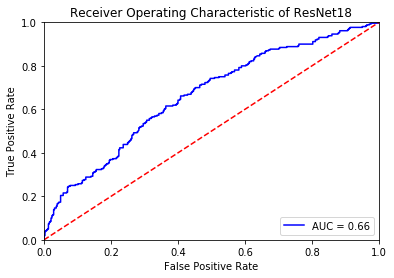

In [6]:
roc_plot(y_target_resnet18, y_score_resnet18, 'ResNet18')

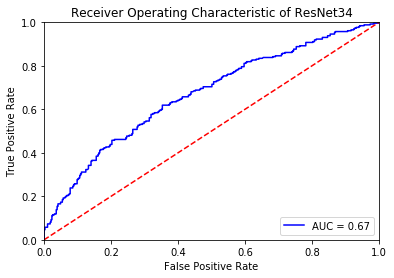

In [7]:
roc_plot(y_target_resnet34, y_score_resnet34, 'ResNet34')

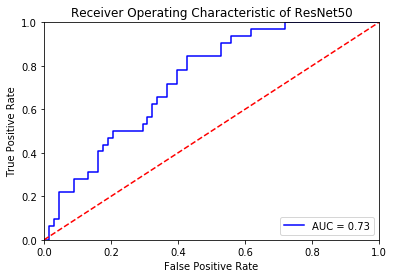

In [10]:
roc_plot(y_target_resnet50, y_score_resnet50, 'ResNet50')

## Average Stacking Method